# Wind turbine characteristics 

We study breifly about general characteristics of a wind turbine in terms of $C_p$ (power coefficient), $C_T$ (thrust coefficient), annual wind power, and little bit of wind turbine controller.


## Power capture

We know the power available in the airflow (this what is potentially available but not what we can extract) is a function of air density $\rho$, area of rotor swept area $A$, ands mean wind inflow $u$ as follows:

$$P_{air}=\frac{1}{2}\rho A u^3$$

According to the Betz limit the maximum power, we can extract from available power as follows

$$P_{max}=0.59P_{air}$$

The power that each certain type of turbine can extract is represented then as follows:

$$P_{out}=C_pP_{air}$$

where $C_p$ denotes the power coefficient that depend on several factors such as rotational effects of wake, rated capacity, aerodynamic design, and impacts of different mechanical losses (in drive train, denerator).According to Betz limit, the maximum value of $C_p$ is $16/27$. 

## Thrust coefficient

The speed at actuator disc ($U_1$) can be expressed AS the average of speed of upwind flow ($U_0$) and downwind ($U_2$):

$$U_1=\frac{U_0+U_2}{2}$$
We can also define a coefficient $a\in [0,1]$ known as axial induction factor to express $U_1$ as a function of upstream wind as

$$U_1=(1-a)U_0$$

Power extracted from turbine at the actuator disk and thrust are connected to each other as $P=TU_1$. Thrust is defined as

$$T=\frac{1}{2}\rho AC_TU_0^2 $$

where the thrust coefficient is estimated as $C_T=4a(1-a)$. Using power and thrust relation, we have

$$C_p=4a(1-a)^2$$




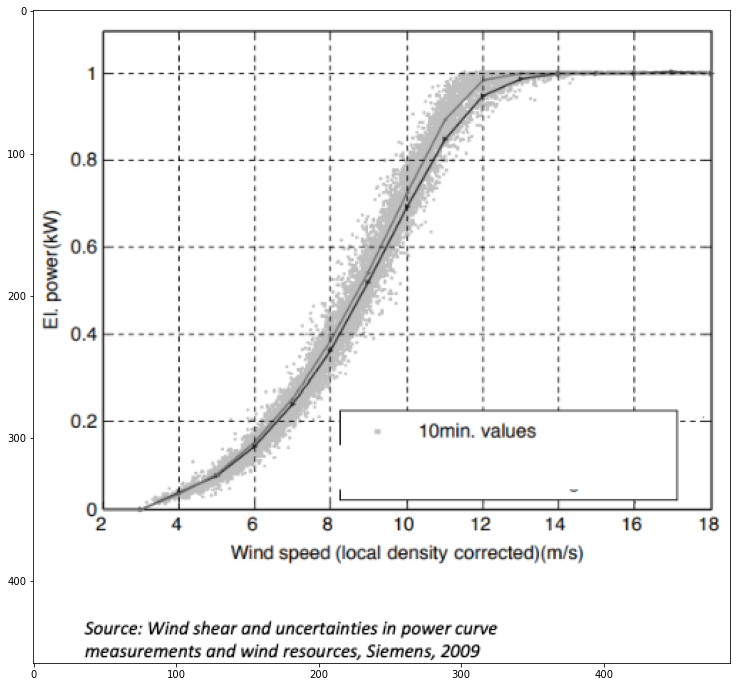

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as img
image=img.imread("PowerCurve.PNG")

fig = plt.figure(figsize=(20, 12))
plt.imshow(image)
plt.show()

# What is a controller

Assume we have a Tesla car and we would like to test it. It should drive 1km a straight road with no obstacle. By knwoing the speed of car, the car get to the point (by knowing the speed we will know how long the car needs to reach to the target point). This is an example of an __open loop__ system since there is no other adjustment based on positioning of car as a function of time. If there is a problem in one of wheel so that the car deviates from straight line, whether it is possible Tesla could end onto the right position if accuracy matters? If there is some problem in the internal system of car so that it drives faster or slower, whether the car reaches to its target location? 

In above example we put speed on car and expect moves for a certain time as shown in following figure

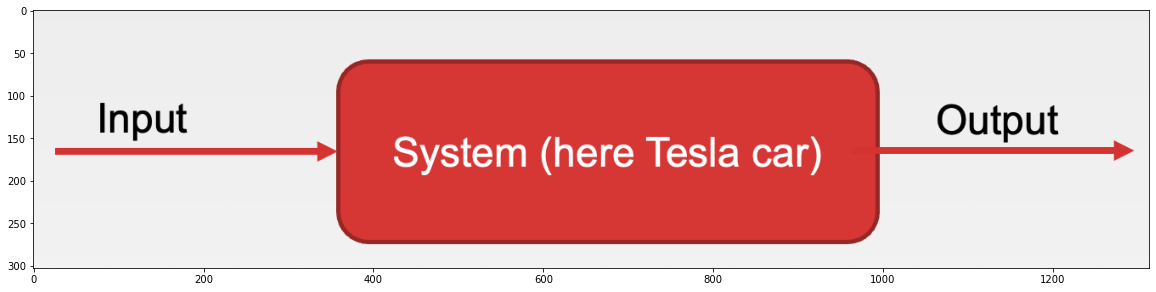

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as img
image=img.imread("OpenLoop.PNG")

fig = plt.figure(figsize=(20, 12))
plt.imshow(image)
plt.show()

To resolve above issue, we can use __feedback control__ (or __close loop__ control) in which at different times the location of car is fed back to the car and car apply required adjusments. But we need a __reference__ in order to make such adjustment. Assume we have __observational data__ as reference. In this case the difference between the feedback current location (where you are) and measured one, where you have to be (__the error__) is the one is passed into the system (plant, car in our case). 




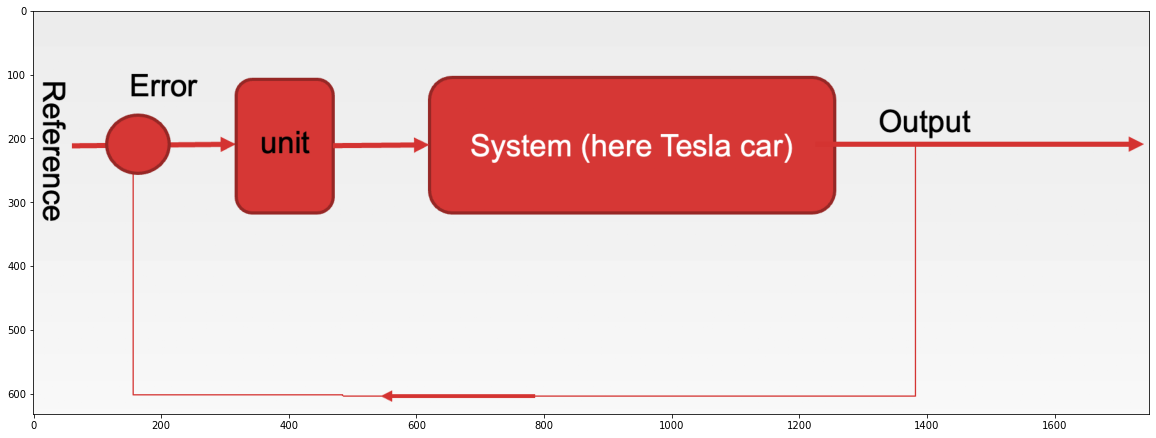

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as img
image=img.imread("FeedbackControl.PNG")

fig = plt.figure(figsize=(20, 12))
plt.imshow(image)
plt.show()

Here, we are going to pass the location difference as input to the car while it accepts speed as input. Therefore, we need to resolve the unit difference here. Ultimate goal is to reduce this error as a function of time. It means the by getting very small error the location of car at the end of journey will be exactly at the target position.


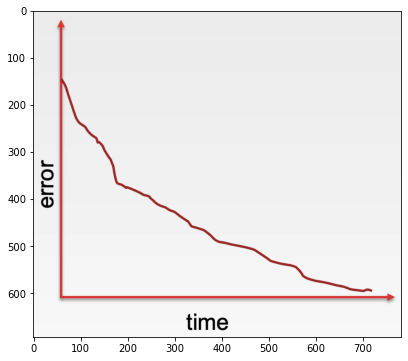

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as img
image=img.imread("ErrorFeedbackControl.PNG")

fig = plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.show()

__Example:__ Assume a non-automatic car as the __plant__. We use gas pedal to reach a certain speed, $u_{car}$. Speed gage is our reference, i.e. $u_{ref}$. Therefore we should make a bridge between gas pedal position and car speed. Assume car pedal position is represented by the angle $\theta$ which is zero when we fully press the pedal (this angle controls the velocity $\dot x$). If we press the pedal half way, the car accelerate and will stay fixed at speed (if we hold it long enough). We change angle over time. 

Assume we are waiting for a trafic light to become green, and the max speed is $30$ km/h. When the light turns to green: 
1. we press the pedal to a certain angle so that car could accelerate and get gratually to 30 km/h. In the speed gage, we see the difference between the car speed and the reference speed of 30 km/h, i.e. $e(t)$, is decreasing and approaching to zero (__error__ $\rightarrow$ zero). Here, we adjust the pedal's angle to keep the error close to the zero (we can assume the error is no longer time-dependent and is __steady-state__, $de(t)/dt\sim 0$). Here, we define error $e(t)=u_{ref}-u_{car}$. 


2. we sharply accelerate (too much gas) so that in very short time, the car speed proceeds 30 km/h (we observe in the speed gage this behaviour), and we get larger error and need then to depress the pedal in order to decelerate the car (each time one change is applied). Error in this case is negative (in this case we have __overshooting__).  

In above two cases, we press the pedal an increase $\dot \theta$ (change of pedal angle), we have used __proportional controller__ in which we gave gains to input (i.e. $\dot \theta$)

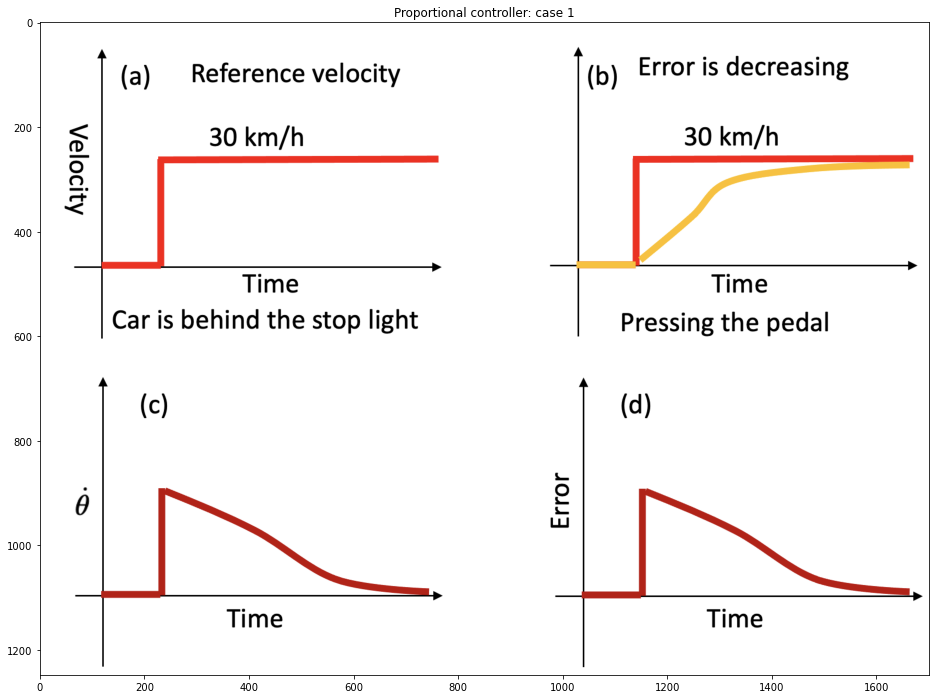

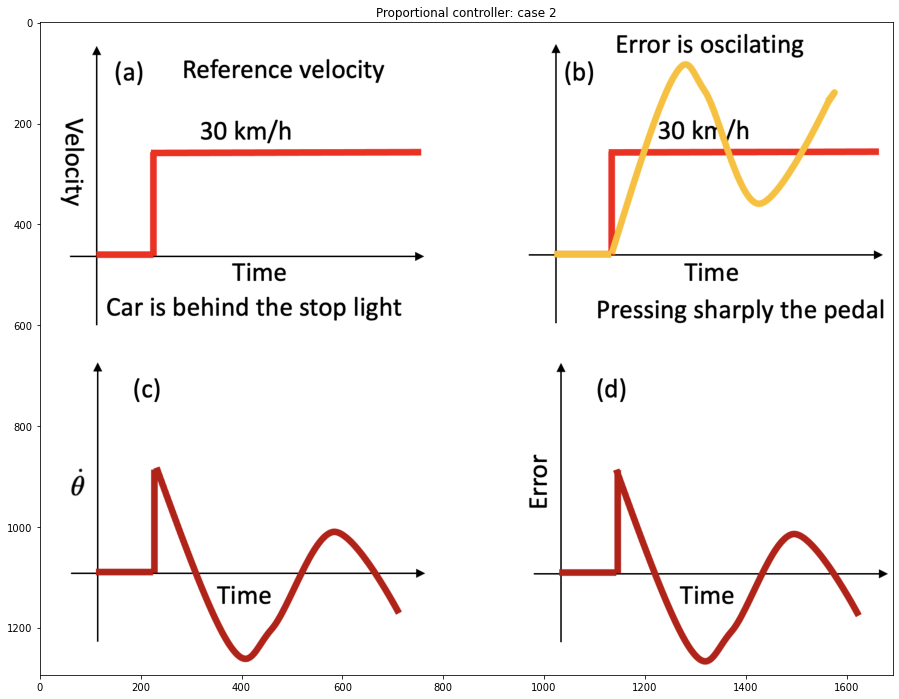

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as img
image=img.imread("Prop1.PNG")

fig = plt.figure(figsize=(20, 12))
plt.imshow(image)
plt.title("Proportional controller: case 1")
plt.show()


import matplotlib.pyplot as plt
import matplotlib.image as img
image=img.imread("Prop2.PNG")

fig = plt.figure(figsize=(20, 12))
plt.imshow(image)
plt.title("Proportional controller: case 2")
plt.show()

__Proportional control (P-control)__ amplifies the error proportionally.This is a quick reaction to reduce the error. It is called also proportional gain and denoted by $K_P$ (can take zero, positive, and negative values). Postive value increases the speed of response while a negative value declines the oscillation (this also reduces speed of response). In first case, $K_p$ is positive but very small leading to asymptotical behaviour for the speed. In second example $K_p$ gets both positive and negative values. If the values are not that big, we will experience overshooting that damps slowly (the reaction strength reduces positively when approaching to the reference state). However, for very large value of $K_p$ by increasing the reaction speed, we will get strong oscillations that damp slowly by time (at begining $K_p$ is large and gradually decrease as soon as approaching to the reference value but it passes the reference values and when the error starts to increase again it react in opposite direction, here is where we get overshoot). In short, it is not too easy to get a good closed-loop control system by the use of only proportional controller.

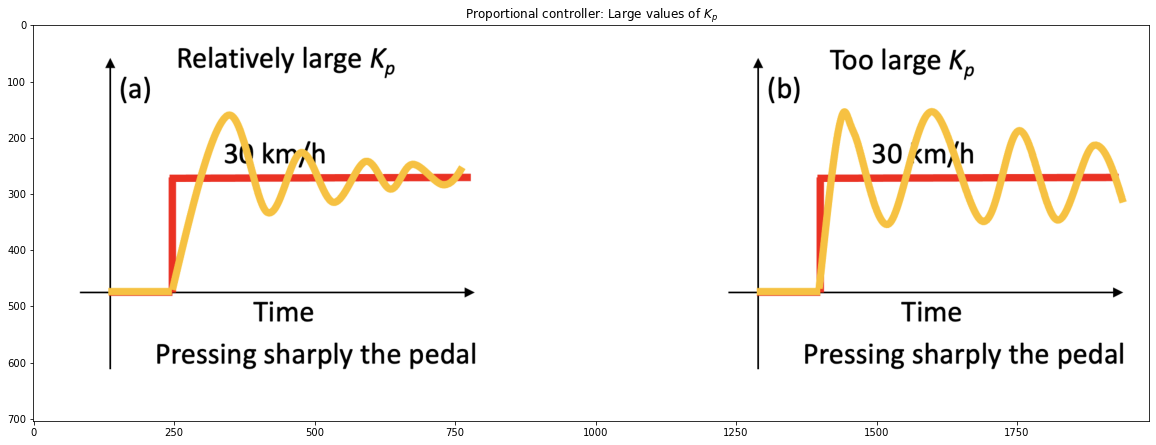

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as img
image=img.imread("Prop3.PNG")

fig = plt.figure(figsize=(20, 12))
plt.imshow(image)
plt.title(r"Proportional controller: Large values of $K_p$")
plt.show()

__Derevative component__ of a controller helps we could tackle the issue of strong overshooting during applying the P-control. The derivative gain, $K_d$, understands the vicinity to the reference state and enforces reduction of reaction speed by giving a value in opposite direction. 

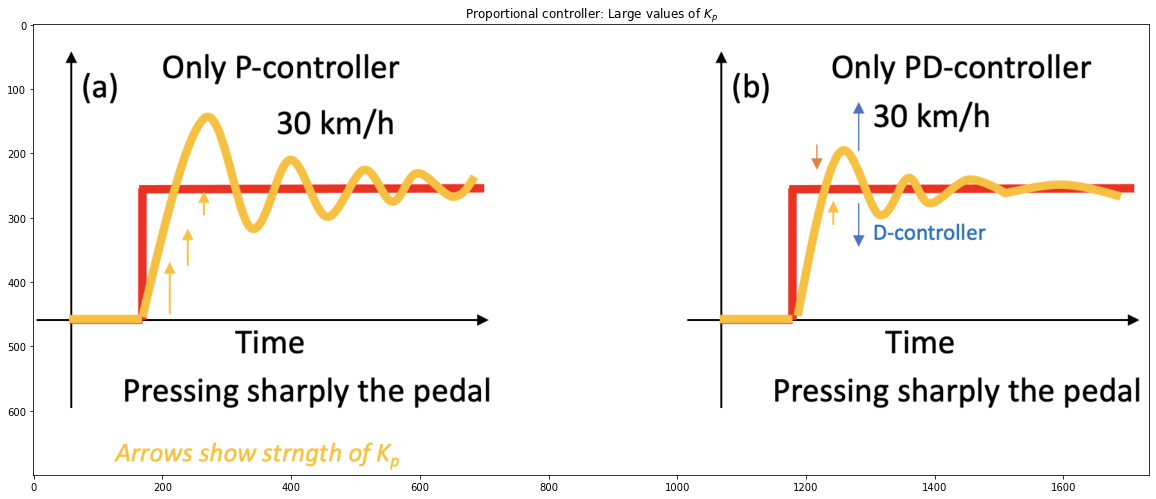

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as img
image=img.imread("Prop4.PNG")

fig = plt.figure(figsize=(20, 12))
plt.imshow(image)
plt.title(r"Proportional controller: Large values of $K_p$")
plt.show()

D-controller (introduced through derevative gain $K_d$) is able to reduced the overshooting but is sensitive to the noisy data because it cause overreaction while P-controller does not react too much. This is why we need to apply proper filtering for input data to the controller. Above figure (right) shows combination of P- and D-controller (i.e. __PD-controller__).


Let's to come back to the case 1 of P-controller. It may happen that with small value of $K_p$ we asymptotically approach to the reference state but very slow convergence (or the speed not get to 30 km/h but around 29.5 km/h). If we are going to approach to zero, the __integral gain__, (indicated by $K_i$) take a look on history and notice this slow convergence and try to compensate it, so that the speed gets to zero by time.

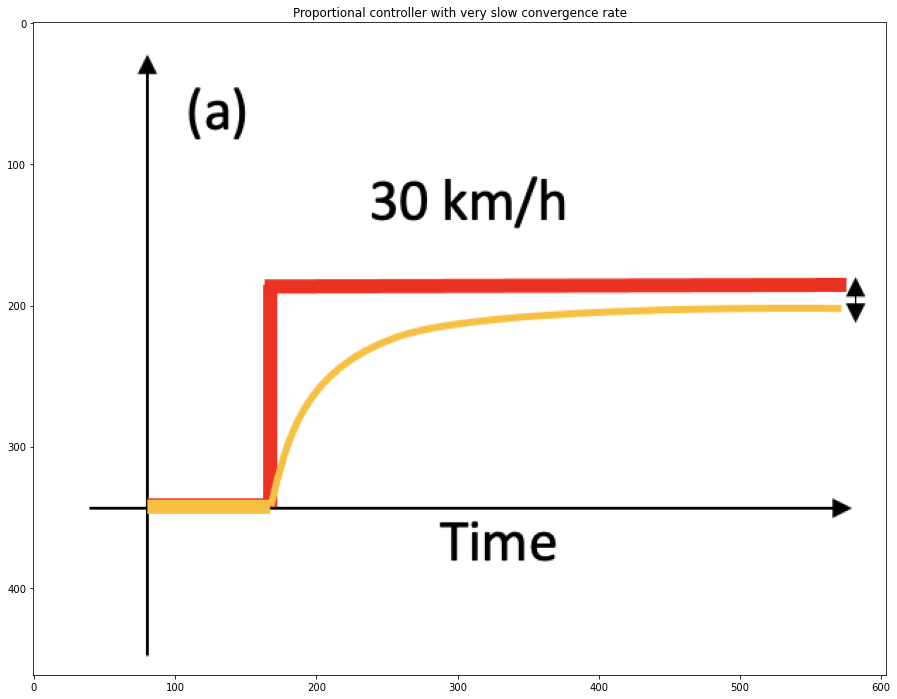

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as img
image=img.imread("Prop5.PNG")

fig = plt.figure(figsize=(20, 12))
plt.imshow(image)
plt.title(r"Proportional controller with very slow convergence rate")
plt.show()

# A note on control system of a Horizontal Axis Wind Turbine (HAWT)


There are different type of controller in a HAWT such as 

__Yaw controller__

__Standard oerational control systems__ (generator torque, mechanical brakes, pitch control, etc, emergency shut-down, power regulation, etc).

__Floater motions control__


In order to understand how controllers work, it is important to know the standard operational features (rotational speed, blade pitchs, etc) of a HAWT that a controller uses. This leads to understanding better different regions of power curve that controllers rely on. Following figure shows 5 different regions of a power curve.

__Region 1__: The wind speed is low so that it is not efficient for power generator to operate. In this region turbine is not operating (idling).

__Region 2__: There is a correlated increase between generated power and wind. In this region, the rotational speed is controlled by the generator torque controller. This will optimize the rotational speed.

__Region 2.5__: This region as shown in the figure is a transition region in which generator torque controller causes a constant rotor speed.

__Region 3__: This is the region of rated power production and blade pitch is active here to keep the generator torqque constant or maintain any defined constant power strategy.

__Region 4__: Thurin in this region is not operating (idling).






A controller in its simplest form for an input timeseries $x(t)$ and output timeseries $e(t)$ (which is the different/error between the observed and measured signals) is represented as follows


$$e(t)=K_d\frac{dx}{dt}+K_px+K_i\int_0^t x dt.$$


Here $K_p, K_d$, and $K_i$ are the proportional, derivative, and integrate gains, respectively. Note that we need to carefully filter out the input signal for the controller system.




## Control below the rated wind speed (generator torque control)


Assume tip speed of $\gamma$ and in this case, we do not implement any pitch control, rotor speed is variable, and we aim to optimize the generator torque curve and reach a constant tip speed ration. 



## Control above the rated wind speed (generator torque control)


In this case we regulate the generator torque by the use of collective blade pitch in order to achive constant power and constant torque. Assume to denote the rotational speed of generator and the rated power by $\omega$ and $P_o$ respectively. The generator torque, $q_g$, is given (for constant torque) as

$$q_g=\frac{P_o}{\omega_0}$$


where $\omega_0$ is the rated rotational speed of the generator (remember power=torque$\times$ speed). To keep power constant, we use following 

$$q_g=\frac{P_o}{\omega}$$


Above relations states that the generator torque inversely is proportional to rotational speed. Assume the we are going to use a Proportional-Integral (PI) controller for the pitch, $\beta$. We use rotational speed as input to the controller, and pitch angle needs to be controlled and therefore we use the difference of blade pitch difference $\Delta \beta$:

$$\Delta \beta (t)=K_(\omega-\omega_0)+K_i\int_0^t (\omega - \omega_0)dt$$



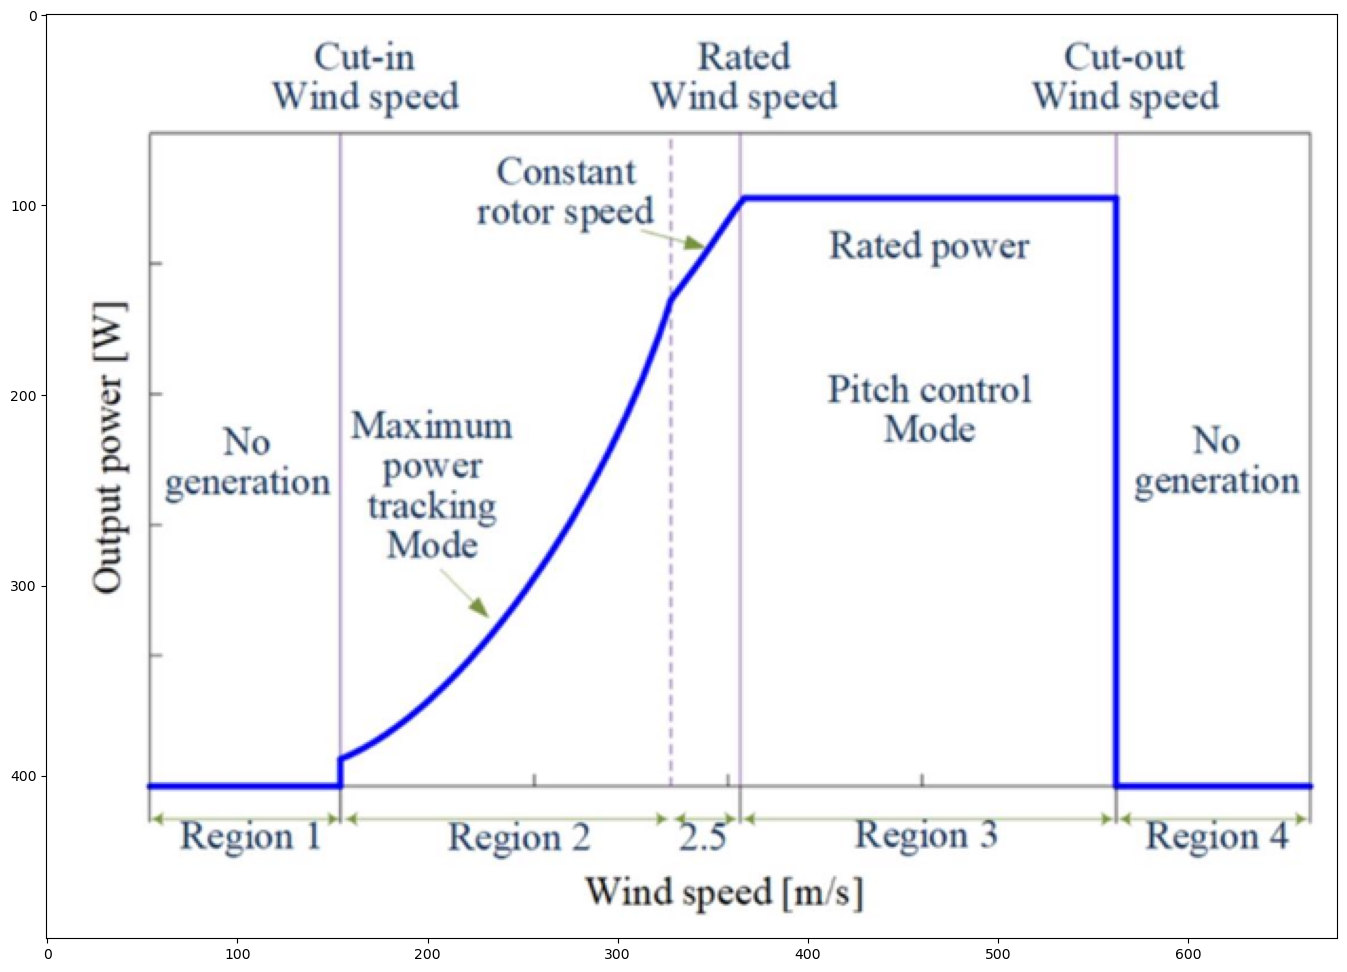

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
image=img.imread("OperationalRegions.PNG")

fig = plt.figure(figsize=(20, 12))
plt.imshow(image)
plt.show()